In [ ]:
!pip install rtree
!pip install pygeos
!pip install geopandas
!pip install shapely

     |████████████████████████████████| 994 kB 3.8 MB/s 
     |████████████████████████████████| 1.8 MB 3.9 MB/s 
     |████████████████████████████████| 994 kB 4.0 MB/s 
     |████████████████████████████████| 6.6 MB 34.7 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 


In [ ]:
### Load spatial libraries
import rtree
import pygeos
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Spatial Steps: 
1. Load and merge admin dataframe with current dataframe
2. Load and merge charging location dataframe
3. Attempt to find political voting patterns
4. Merge all and analyse 
5. If time attempt to do twitter analysis

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# loading ev charging points
ev_points_path = '/content/gdrive/My Drive/ENERGY_CLIMATE_HACK/spatial_switzerland/EV_points/'

In [ ]:
charge_points = gpd.read_file(f'{ev_points_path}ev_points.shp')

In [ ]:
list(charge_points['desc'][:10])

['- swisscharge.ch AG, Im Bindersgarten 3\n- 1x Steckdose Typ2 (32A, 3-ph) / Zugang: NewMotion APP, PlugSurfing RFID/APP, E.ON, eins E-Mobil RFID/App, MAINGAU Autostrom, virta/swisscharge app\nEintrag/Korrektur: 04-Feb-2020',
 '- swisscharge.ch AG, Hochhaus 9\n- 5x Steckdose Typ2 (32A, 3-ph) / Zugang: NewMotion APP, PlugSurfing RFID/APP, E.ON, eins E-Mobil RFID/App, MAINGAU Autostrom, virta/swisscharge app\nEintrag/Korrektur: 04-Feb-2020',
 '- swisscharge.ch AG, Bahnhofstrasse 45\n- 1x Steckdose Typ2 (32A, 3-ph) / Zugang: NewMotion APP, PlugSurfing RFID/APP, E.ON, eins E-Mobil RFID/App, MAINGAU Autostrom, virta/swisscharge app\nEintrag/Korrektur: 14-Jul-2020',
 '- swisscharge.ch AG, Pilatusstrasse 10\n- 2x Steckdose Typ2 (32A, 3-ph) / Zugang: NewMotion APP, PlugSurfing RFID/APP, E.ON, eins E-Mobil RFID/App, MAINGAU Autostrom, virta/swisscharge app\nEintrag/Korrektur: 14-Jul-2020',
 '- swisscharge.ch AG, Route de l&#39;Ancienne Ferme 2\n- 2x Steckdose Typ2 (32A, 3-ph) / Zugang: NewMotio

In [ ]:
admin_path = '/content/gdrive/My Drive/ENERGY_CLIMATE_HACK/spatial_switzerland/admin_area/'

In [ ]:
admin = gpd.read_file(f'{admin_path}CHE_adm2.shp')

In [ ]:
## Spatial join
### Make same CRS
charge_points = charge_points.set_crs("EPSG:4326")
admin = admin.set_crs("EPSG:4326")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Swiss EV Charging Locations ')

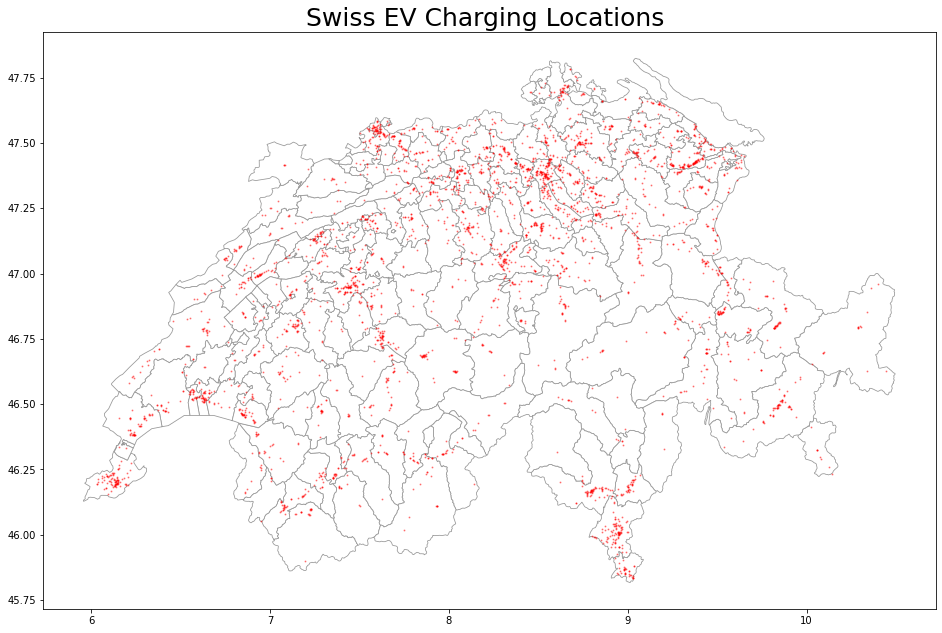

In [ ]:
# plot swiss ev charging locations

fig, ax = plt.subplots(1, figsize=(16, 16))
admin.plot(ax=ax, color='white', linewidth=0.8, edgecolor='0.6')
charge_points.plot(ax=ax, markersize=1, color='red', alpha=0.4)

ax.set_title("Swiss EV Charging Locations ", fontdict={'fontsize': '25', 'fontweight' : '3'})
# plt.savefig('charts/osm_pv_locations_v1.png', dpi=150)